In [1]:
import pandas as pd

# Load the datasets to examine their structure and contents
file_paths = {
    "Final_Complete_Merged_Dataset": "/Users/samratonse/Documents/Harrisburg/Semester 6/Thesis/Thesis Analysis/Thesis_Data/Final_Complete_Merged_Dataset.xlsx",
    "Secondhand": "/Users/samratonse/Documents/Harrisburg/Semester 6/Thesis/Thesis Analysis/Thesis_Data/Secondhand.xlsx",
    "Sustainable": "/Users/samratonse/Documents/Harrisburg/Semester 6/Thesis/Thesis Analysis/Thesis_Data/Sustainable.xlsx"
}

# Load the sheets and structure of the datasets
final_complete_data = pd.ExcelFile(file_paths["Final_Complete_Merged_Dataset"])
secondhand_data = pd.ExcelFile(file_paths["Secondhand"])
sustainable_data = pd.ExcelFile(file_paths["Sustainable"])

# Display sheet names to understand the structure of the files
final_complete_data_sheets = final_complete_data.sheet_names
secondhand_data_sheets = secondhand_data.sheet_names
sustainable_data_sheets = sustainable_data.sheet_names

final_complete_data_sheets, secondhand_data_sheets, sustainable_data_sheets


(['Sheet1'], ['Sheet1'], ['Sheet1'])

In [2]:
# Load the data from the first sheet of each file
final_complete_df = final_complete_data.parse("Sheet1")
secondhand_df = secondhand_data.parse("Sheet1")
sustainable_df = sustainable_data.parse("Sheet1")

# Display the first few rows of each dataset to understand their structure
final_complete_df_head = final_complete_df.head()
secondhand_df_head = secondhand_df.head()
sustainable_df_head = sustainable_df.head()

final_complete_df_head, secondhand_df_head, sustainable_df_head


(         Region  Year  Consumer Spending  Disposable Income  \
 0       Germany  2019            1052.00              35.58   
 1         India  2019              72.64               2.11   
 2        Russia  2019             355.90               8.35   
 3  Saudi Arabia  2019             383.50              11.84   
 4        Turkey  2019             373.80               6.92   
 
    Unemployment Rate  GINI Index  Global Innovation Index (GII)    PLI    GNI  \
 0               2.97        0.31                           0.58  83.08  48.53   
 1               6.51        0.36                           0.37  29.48   2.05   
 2               4.60        0.38                           0.38  40.61  11.64   
 3               5.63        0.43                           0.33  47.53  23.63   
 4              13.73        0.42                           0.37  30.85   9.11   
 
    Internet Penetration  ...  25-44 Years  45-64 Years  65-74 Years  \
 0                 80.52  ...    24.897763    27

In [3]:
# Merge the datasets based on Region and Year
merged_data = (
    final_complete_df
    .merge(secondhand_df, on=["Region", "Year"], how="inner")
    .merge(sustainable_df, on=["Region", "Year"], how="inner")
)

# Check for missing values and structure of the merged dataset
missing_values_summary = merged_data.isnull().sum()
merged_data_head = merged_data.head()

missing_values_summary, merged_data_head


(Region                           0
 Year                             0
 Consumer Spending                0
 Disposable Income                0
 Unemployment Rate                0
 GINI Index                       0
 Global Innovation Index (GII)    0
 PLI                              0
 GNI                              0
 Internet Penetration             0
 0-14 Years                       0
 15-24 Years                      0
 25-44 Years                      0
 45-64 Years                      0
 65-74 Years                      0
 75+ Years                        0
 Class - Higher                   0
 Class - Lower                    0
 Class - Middle                   0
 Gender-Female                    0
 Gender-Male                      0
 EPI                              0
 SecondhandMS                     0
 SustainableMS                    0
 dtype: int64,
          Region  Year  Consumer Spending  Disposable Income  \
 0       Germany  2019            1052.00              35

# Exploratory Data Analysis

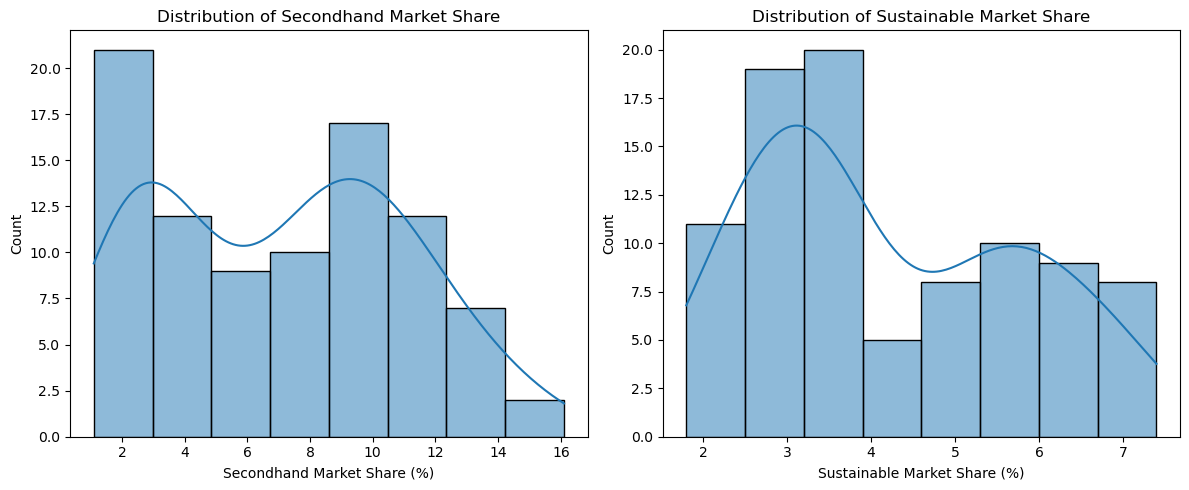

/var/folders/ym/9f1hn4ps53q435lhhvp7ygkc0000gn/T/ipykernel_64143/3255451250.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


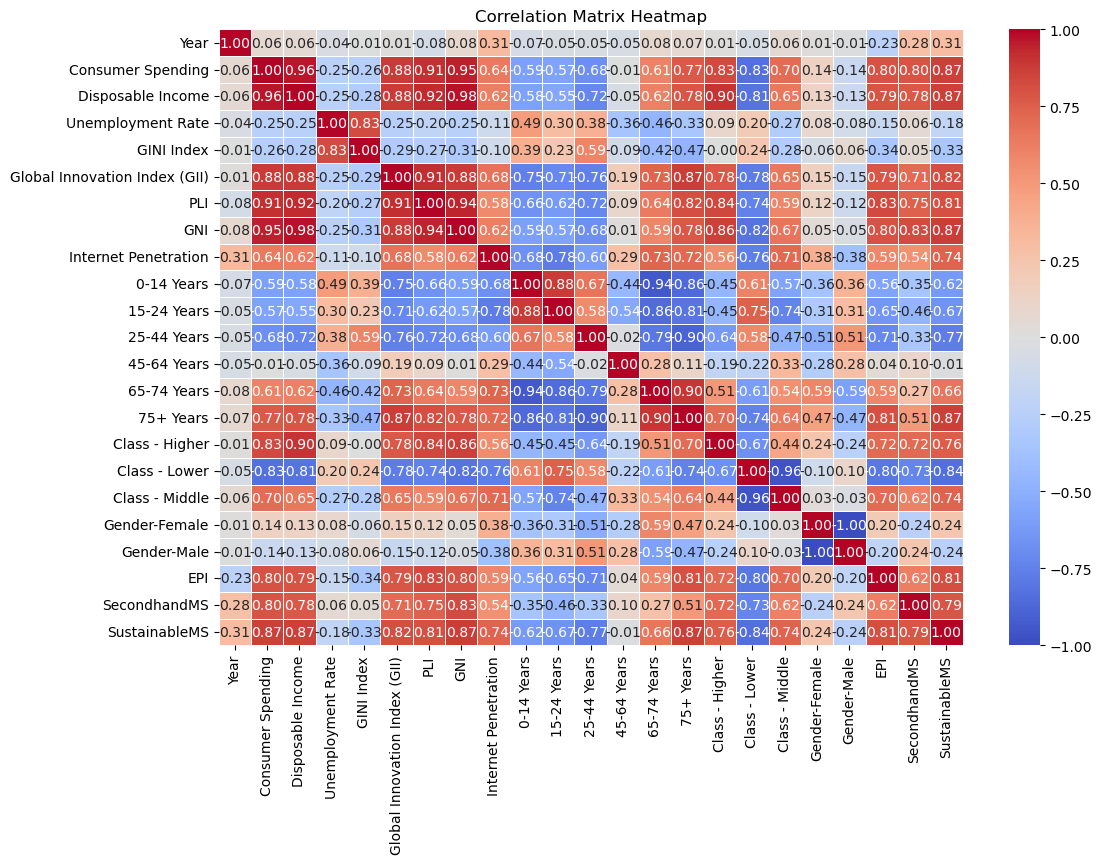

(SecondhandMS                     1.000000
 GNI                              0.827821
 Consumer Spending                0.795808
 SustainableMS                    0.787786
 Disposable Income                0.777087
 PLI                              0.747776
 Class - Higher                   0.715043
 Global Innovation Index (GII)    0.707929
 EPI                              0.620440
 Class - Middle                   0.616485
 Internet Penetration             0.543568
 75+ Years                        0.507001
 Year                             0.283691
 65-74 Years                      0.270599
 Gender-Male                      0.236083
 45-64 Years                      0.097097
 Unemployment Rate                0.056877
 GINI Index                       0.049770
 Gender-Female                   -0.236083
 25-44 Years                     -0.334043
 0-14 Years                      -0.352860
 15-24 Years                     -0.463769
 Class - Lower                   -0.727938
 Name: Seco

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for the dataset
descriptive_stats = merged_data.describe()

# Distribution plots for the target variables
plt.figure(figsize=(12, 5))

# SecondhandMS Distribution
plt.subplot(1, 2, 1)
sns.histplot(merged_data['SecondhandMS'], kde=True)
plt.title("Distribution of Secondhand Market Share")
plt.xlabel("Secondhand Market Share (%)")

# SustainableMS Distribution
plt.subplot(1, 2, 2)
sns.histplot(merged_data['SustainableMS'], kde=True)
plt.title("Distribution of Sustainable Market Share")
plt.xlabel("Sustainable Market Share (%)")

plt.tight_layout()
plt.show()

# Correlation analysis for all variables
correlation_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

correlation_matrix["SecondhandMS"].sort_values(ascending=False), correlation_matrix["SustainableMS"].sort_values(ascending=False)


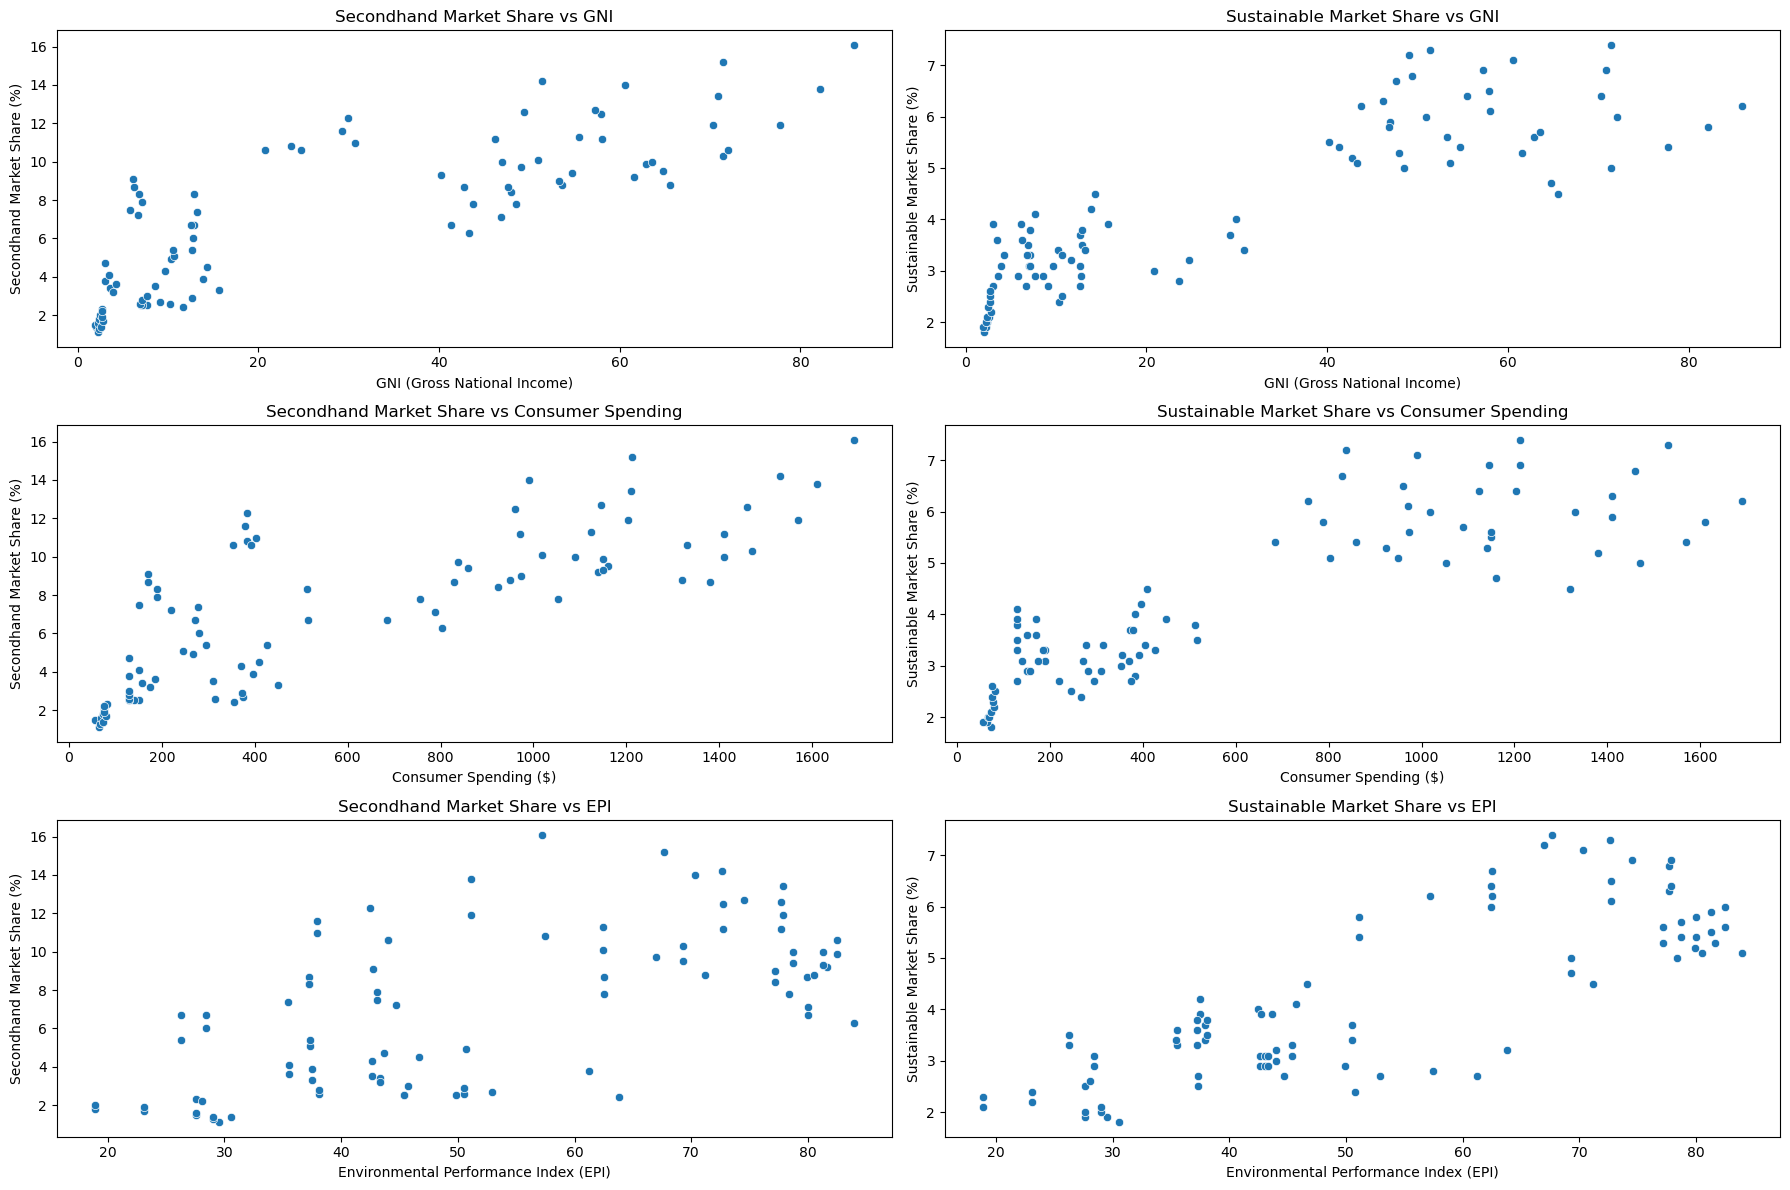

In [5]:
# Scatter plots to visualize relationships with key predictors
plt.figure(figsize=(18, 12))

# SecondhandMS vs GNI
plt.subplot(3, 2, 1)
sns.scatterplot(data=merged_data, x='GNI', y='SecondhandMS')
plt.title("Secondhand Market Share vs GNI")
plt.xlabel("GNI (Gross National Income)")
plt.ylabel("Secondhand Market Share (%)")

# SustainableMS vs GNI
plt.subplot(3, 2, 2)
sns.scatterplot(data=merged_data, x='GNI', y='SustainableMS')
plt.title("Sustainable Market Share vs GNI")
plt.xlabel("GNI (Gross National Income)")
plt.ylabel("Sustainable Market Share (%)")

# SecondhandMS vs Consumer Spending
plt.subplot(3, 2, 3)
sns.scatterplot(data=merged_data, x='Consumer Spending', y='SecondhandMS')
plt.title("Secondhand Market Share vs Consumer Spending")
plt.xlabel("Consumer Spending ($)")
plt.ylabel("Secondhand Market Share (%)")

# SustainableMS vs Consumer Spending
plt.subplot(3, 2, 4)
sns.scatterplot(data=merged_data, x='Consumer Spending', y='SustainableMS')
plt.title("Sustainable Market Share vs Consumer Spending")
plt.xlabel("Consumer Spending ($)")
plt.ylabel("Sustainable Market Share (%)")

# SecondhandMS vs EPI
plt.subplot(3, 2, 5)
sns.scatterplot(data=merged_data, x='EPI', y='SecondhandMS')
plt.title("Secondhand Market Share vs EPI")
plt.xlabel("Environmental Performance Index (EPI)")
plt.ylabel("Secondhand Market Share (%)")

# SustainableMS vs EPI
plt.subplot(3, 2, 6)
sns.scatterplot(data=merged_data, x='EPI', y='SustainableMS')
plt.title("Sustainable Market Share vs EPI")
plt.xlabel("Environmental Performance Index (EPI)")
plt.ylabel("Sustainable Market Share (%)")

plt.tight_layout()
plt.show()


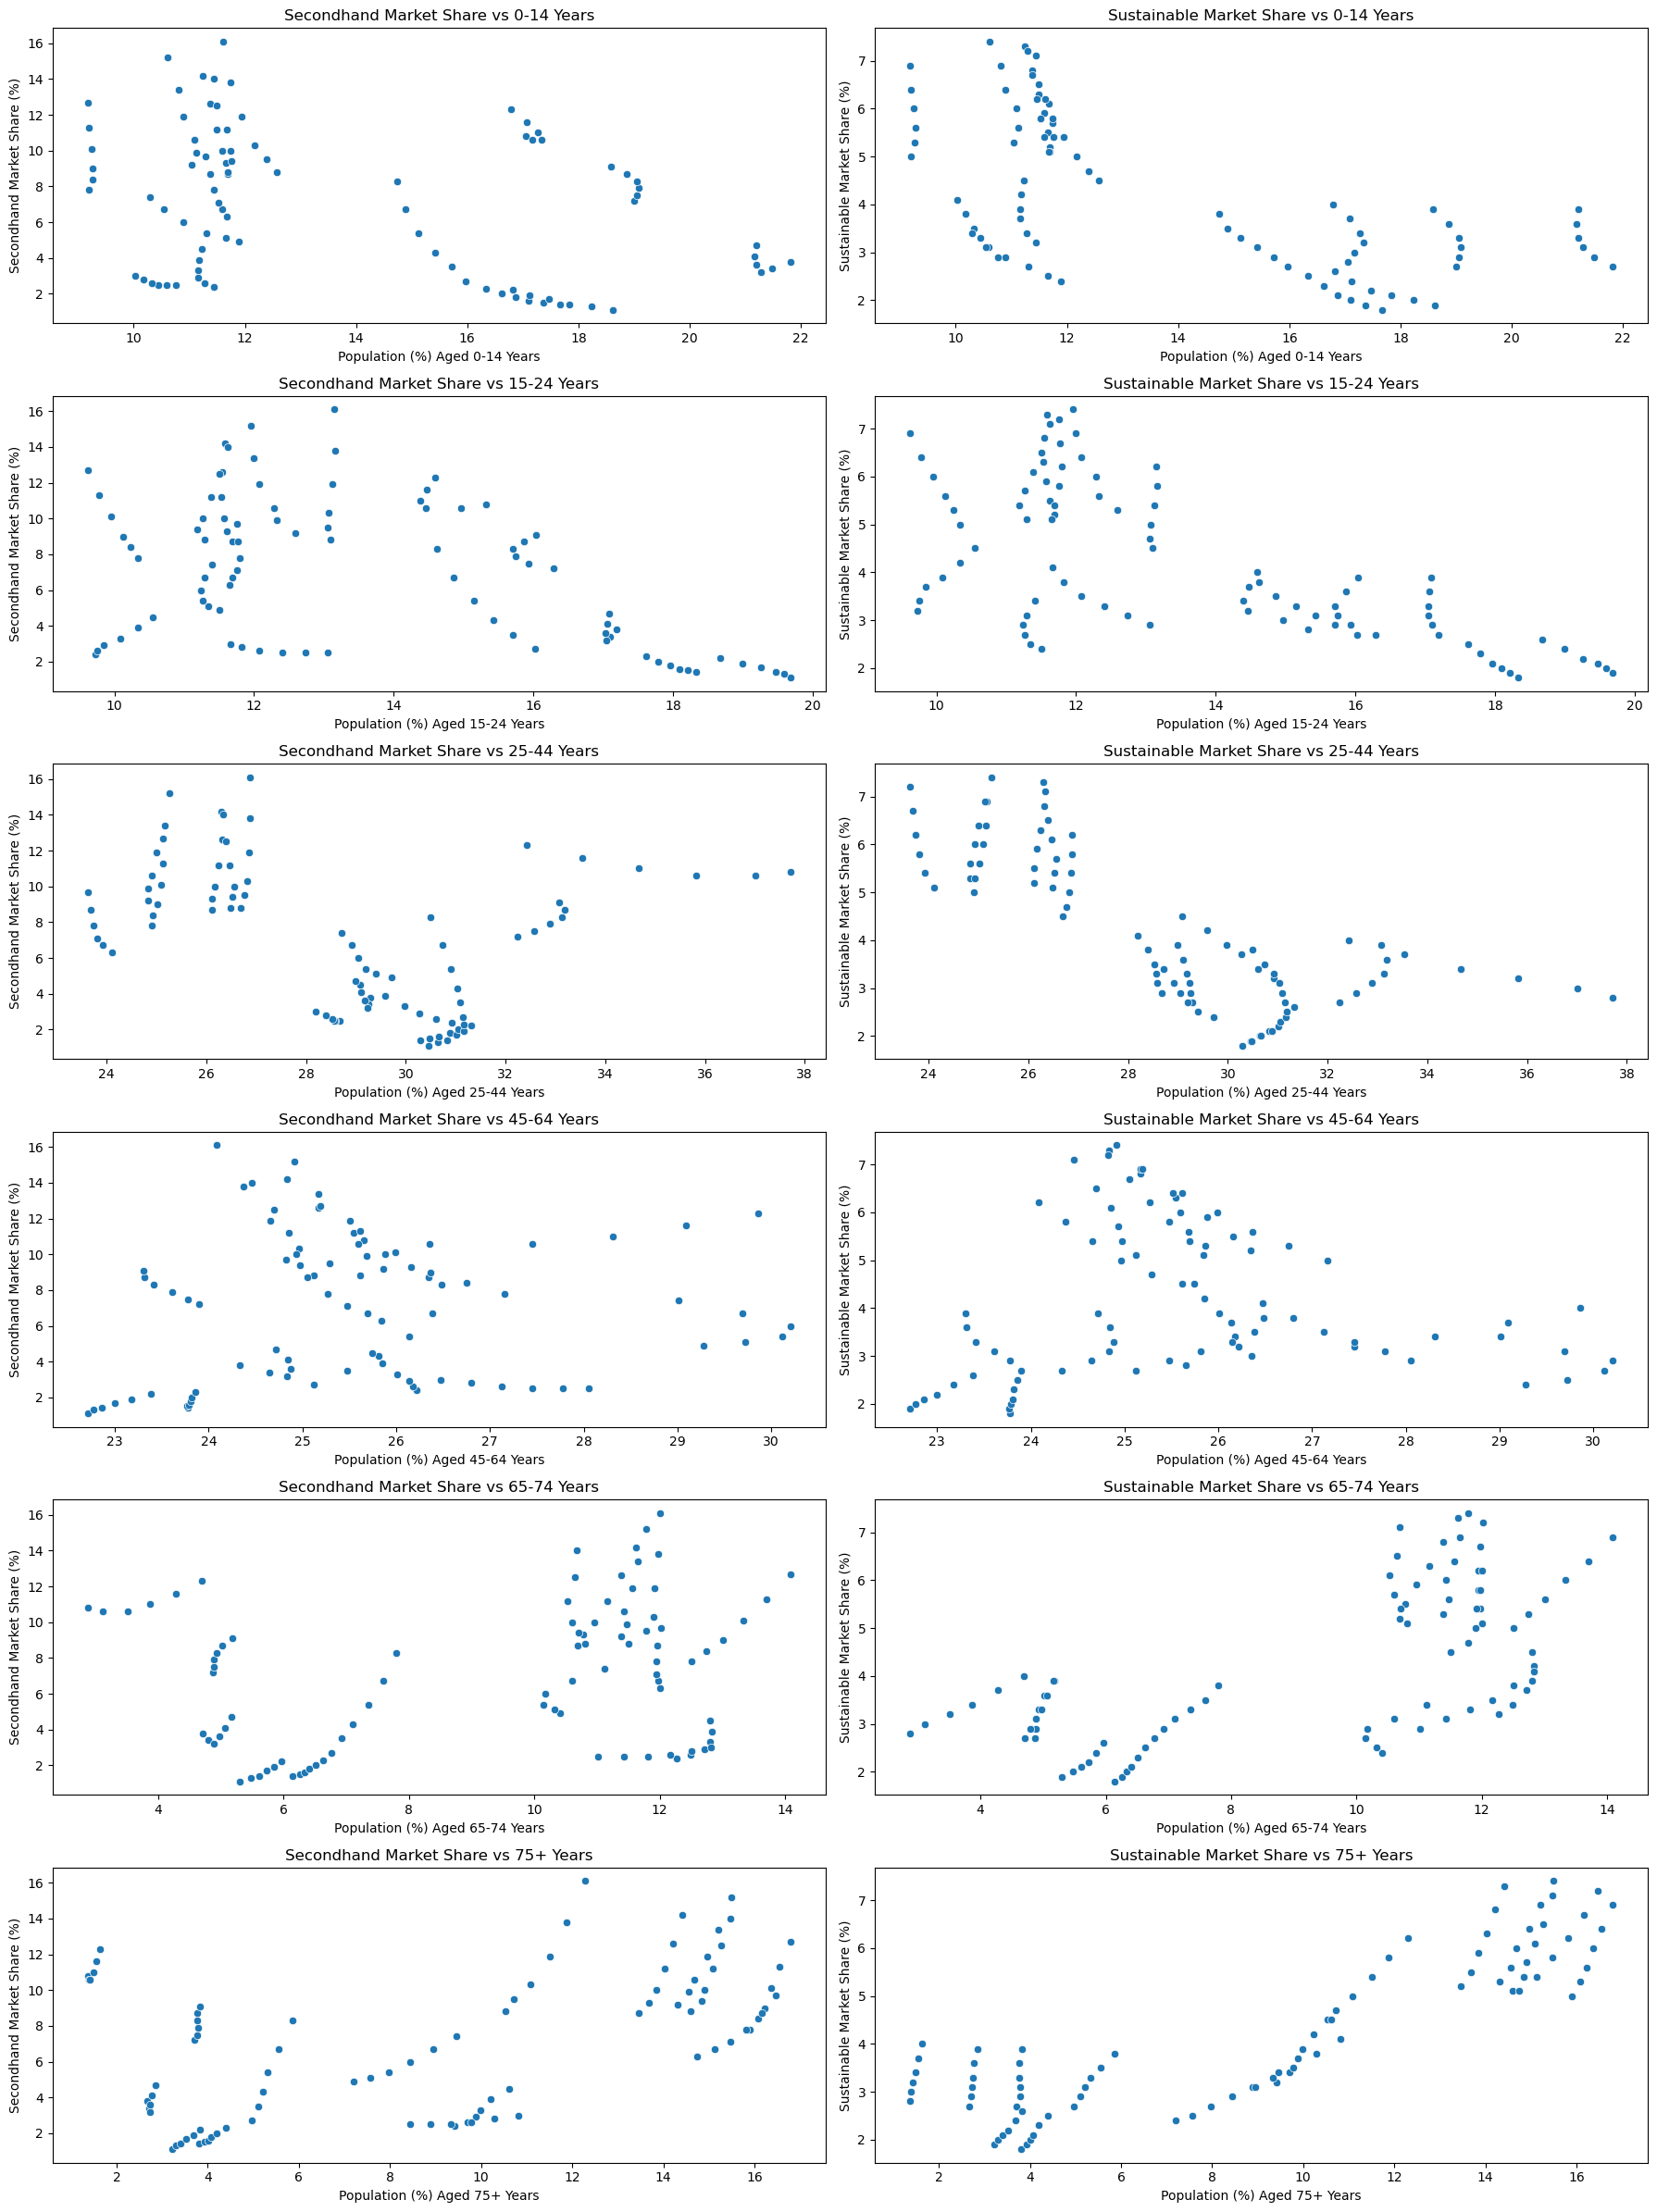

In [6]:
# Scatter plots for all age groups and their relationships with target variables
plt.figure(figsize=(18, 24))

age_groups = ['0-14 Years', '15-24 Years', '25-44 Years', '45-64 Years', '65-74 Years', '75+ Years']

# Plot for each age group with both SecondhandMS and SustainableMS
for i, age_group in enumerate(age_groups):
    plt.subplot(6, 2, 2 * i + 1)
    sns.scatterplot(data=merged_data, x=age_group, y='SecondhandMS')
    plt.title(f"Secondhand Market Share vs {age_group}")
    plt.xlabel(f"Population (%) Aged {age_group}")
    plt.ylabel("Secondhand Market Share (%)")
    
    plt.subplot(6, 2, 2 * i + 2)
    sns.scatterplot(data=merged_data, x=age_group, y='SustainableMS')
    plt.title(f"Sustainable Market Share vs {age_group}")
    plt.xlabel(f"Population (%) Aged {age_group}")
    plt.ylabel("Sustainable Market Share (%)")

plt.tight_layout()
plt.show()


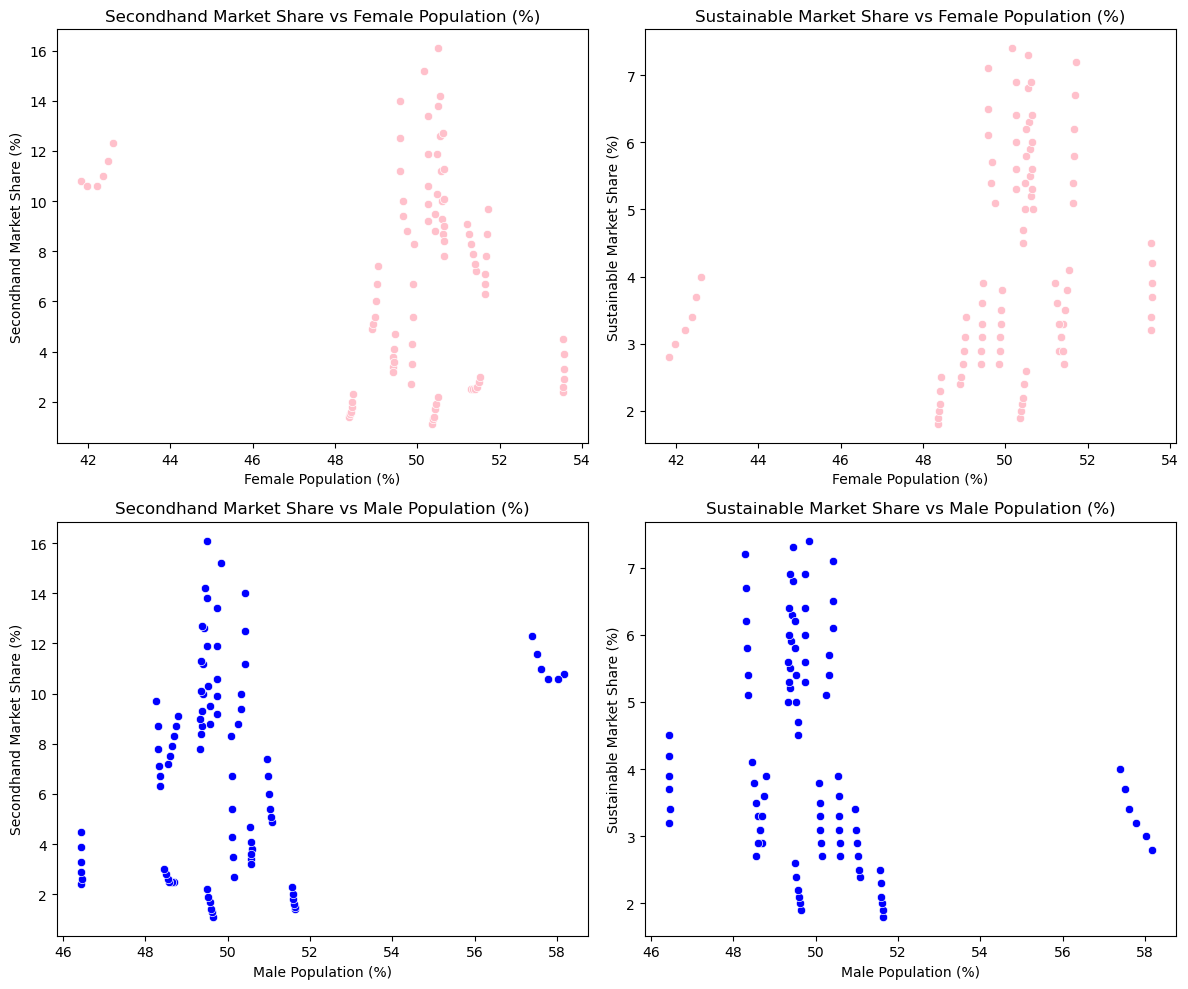

In [7]:
# Scatter plots to examine the relationship between gender distribution and the target variables
plt.figure(figsize=(12, 10))

# Gender-Female vs Target Variables
plt.subplot(2, 2, 1)
sns.scatterplot(data=merged_data, x='Gender-Female', y='SecondhandMS', color='pink')
plt.title("Secondhand Market Share vs Female Population (%)")
plt.xlabel("Female Population (%)")
plt.ylabel("Secondhand Market Share (%)")

plt.subplot(2, 2, 2)
sns.scatterplot(data=merged_data, x='Gender-Female', y='SustainableMS', color='pink')
plt.title("Sustainable Market Share vs Female Population (%)")
plt.xlabel("Female Population (%)")
plt.ylabel("Sustainable Market Share (%)")

# Gender-Male vs Target Variables
plt.subplot(2, 2, 3)
sns.scatterplot(data=merged_data, x='Gender-Male', y='SecondhandMS', color='blue')
plt.title("Secondhand Market Share vs Male Population (%)")
plt.xlabel("Male Population (%)")
plt.ylabel("Secondhand Market Share (%)")

plt.subplot(2, 2, 4)
sns.scatterplot(data=merged_data, x='Gender-Male', y='SustainableMS', color='blue')
plt.title("Sustainable Market Share vs Male Population (%)")
plt.xlabel("Male Population (%)")
plt.ylabel("Sustainable Market Share (%)")

plt.tight_layout()
plt.show()


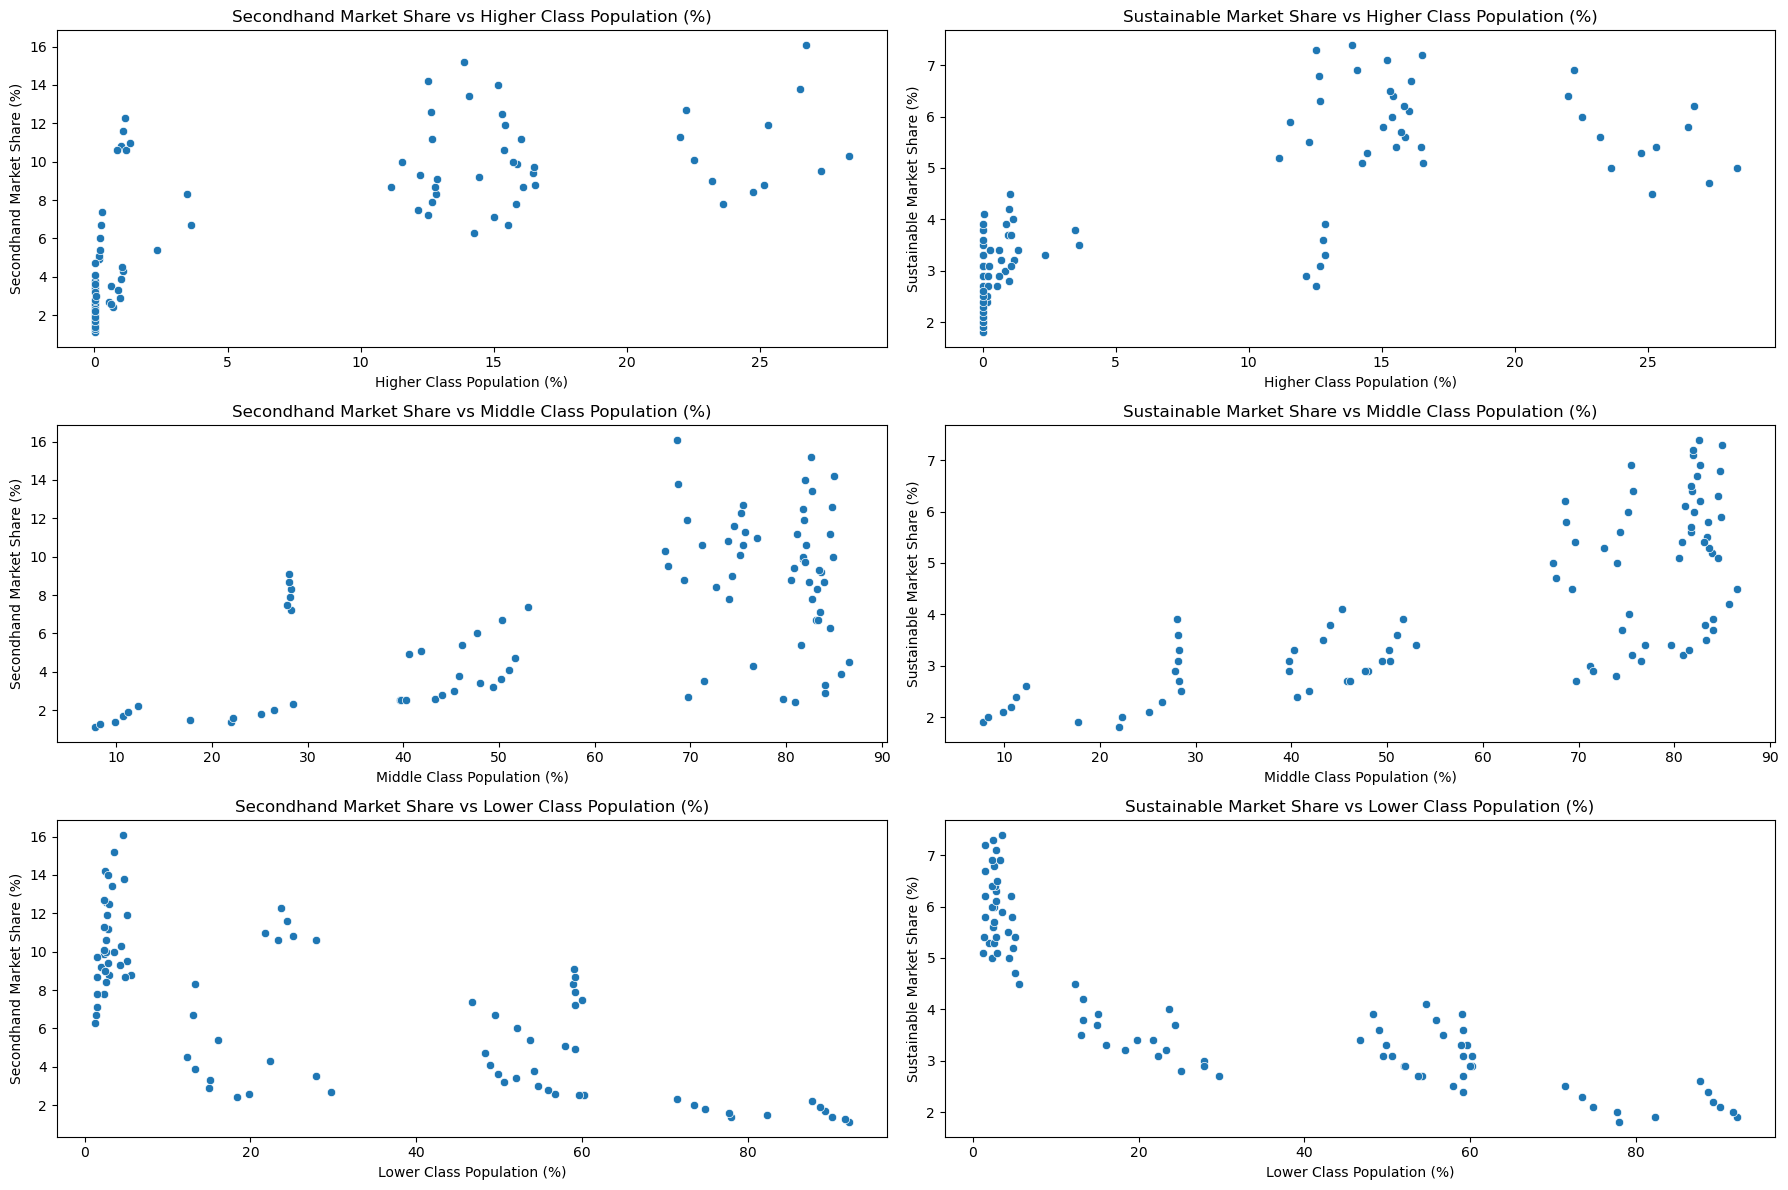

In [8]:
# Scatter plots to examine the relationship between class distribution and the target variables
plt.figure(figsize=(18, 12))

# Class - Higher vs Target Variables
plt.subplot(3, 2, 1)
sns.scatterplot(data=merged_data, x='Class - Higher', y='SecondhandMS')
plt.title("Secondhand Market Share vs Higher Class Population (%)")
plt.xlabel("Higher Class Population (%)")
plt.ylabel("Secondhand Market Share (%)")

plt.subplot(3, 2, 2)
sns.scatterplot(data=merged_data, x='Class - Higher', y='SustainableMS')
plt.title("Sustainable Market Share vs Higher Class Population (%)")
plt.xlabel("Higher Class Population (%)")
plt.ylabel("Sustainable Market Share (%)")

# Class - Middle vs Target Variables
plt.subplot(3, 2, 3)
sns.scatterplot(data=merged_data, x='Class - Middle', y='SecondhandMS')
plt.title("Secondhand Market Share vs Middle Class Population (%)")
plt.xlabel("Middle Class Population (%)")
plt.ylabel("Secondhand Market Share (%)")

plt.subplot(3, 2, 4)
sns.scatterplot(data=merged_data, x='Class - Middle', y='SustainableMS')
plt.title("Sustainable Market Share vs Middle Class Population (%)")
plt.xlabel("Middle Class Population (%)")
plt.ylabel("Sustainable Market Share (%)")

# Class - Lower vs Target Variables
plt.subplot(3, 2, 5)
sns.scatterplot(data=merged_data, x='Class - Lower', y='SecondhandMS')
plt.title("Secondhand Market Share vs Lower Class Population (%)")
plt.xlabel("Lower Class Population (%)")
plt.ylabel("Secondhand Market Share (%)")

plt.subplot(3, 2, 6)
sns.scatterplot(data=merged_data, x='Class - Lower', y='SustainableMS')
plt.title("Sustainable Market Share vs Lower Class Population (%)")
plt.xlabel("Lower Class Population (%)")
plt.ylabel("Sustainable Market Share (%)")

plt.tight_layout()
plt.show()


# K-means Clustering

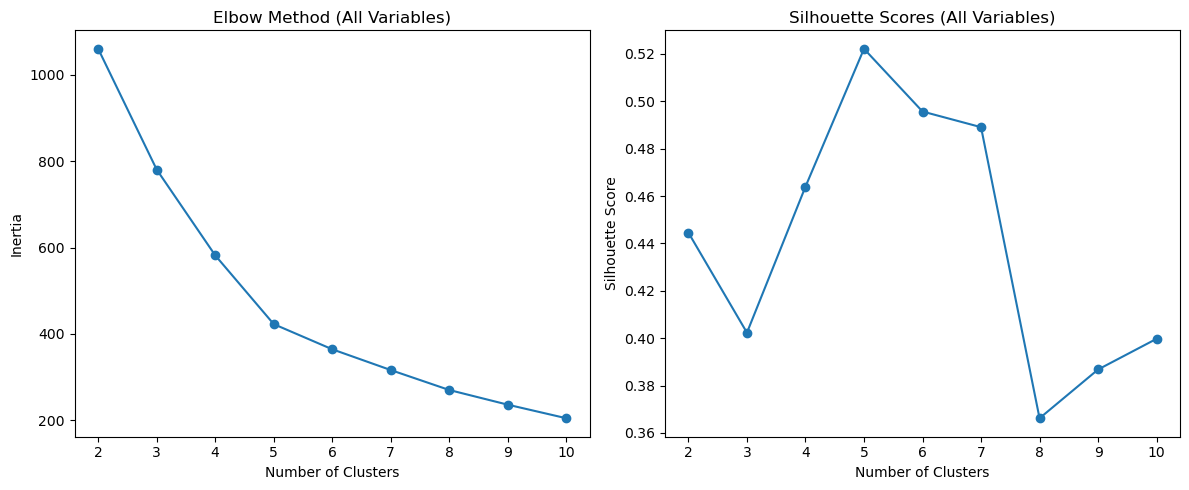

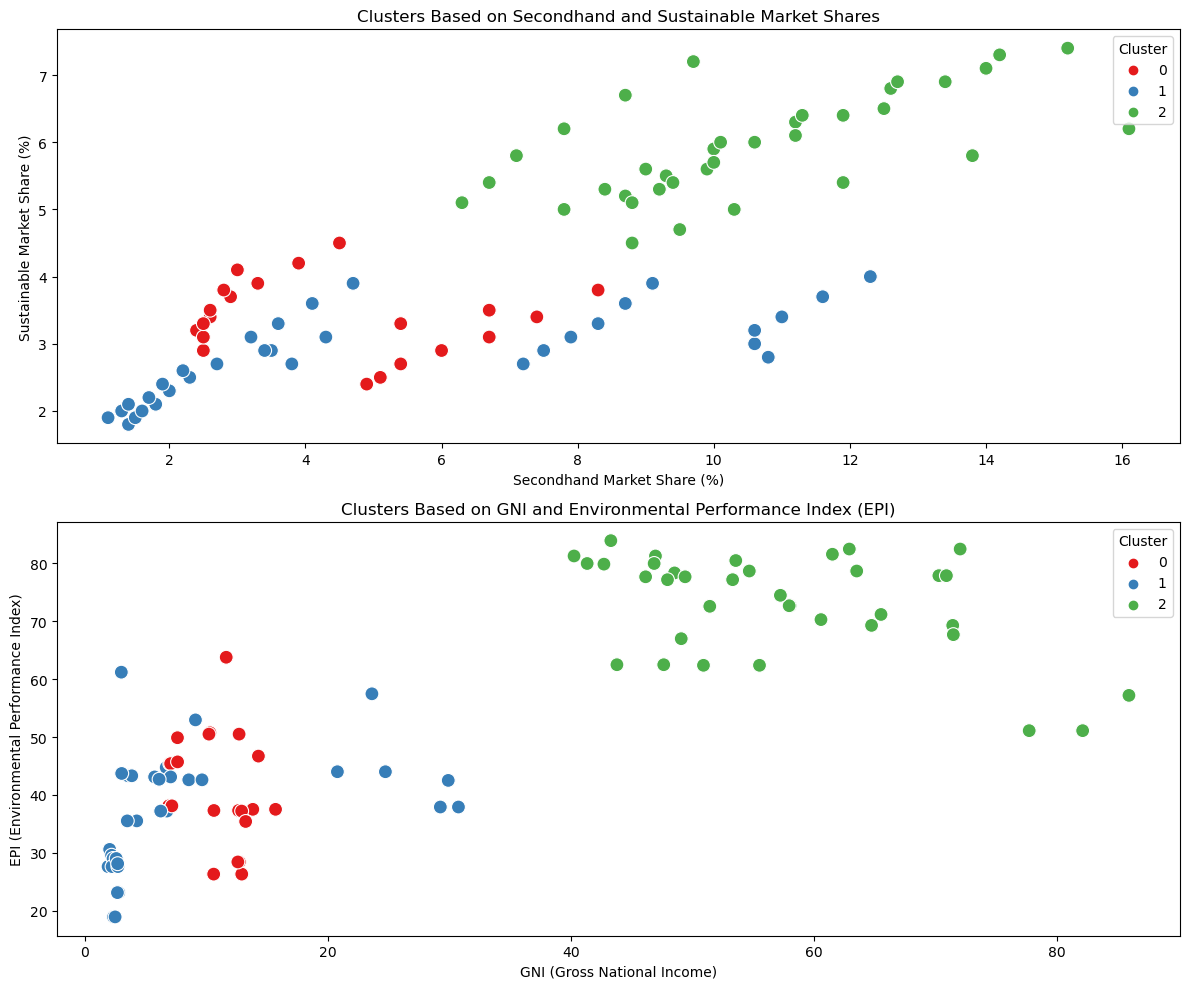

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

scaler = StandardScaler()

# Perform clustering with all numerical variables from the dataset
all_features = merged_data.select_dtypes(include=[np.number]).columns.tolist()
data_for_clustering_all = merged_data[all_features]

# Standardize the data
scaled_data_all = scaler.fit_transform(data_for_clustering_all)

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score for all features
inertia_all = []
silhouette_scores_all = []
cluster_range = range(2, 11)  # Testing between 2 and 10 clusters

for n_clusters in cluster_range:
    kmeans_all = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)
    kmeans_all.fit(scaled_data_all)
    inertia_all.append(kmeans_all.inertia_)
    silhouette_scores_all.append(silhouette_score(scaled_data_all, kmeans_all.labels_))

# Plot the Elbow Method and Silhouette Scores for all features
plt.figure(figsize=(12, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_all, marker='o')
plt.title('Elbow Method (All Variables)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores_all, marker='o')
plt.title('Silhouette Scores (All Variables)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Fit KMeans using the determined optimal clusters (e.g., 3 from earlier insights)
optimal_clusters_all = 3
kmeans_all = KMeans(n_clusters=optimal_clusters_all, n_init=10, random_state=42)
clusters_all = kmeans_all.fit_predict(scaled_data_all)

# Add cluster labels to the dataset
merged_data['Cluster_All'] = clusters_all

# Extract and inverse transform cluster centers
cluster_centers_all = scaler.inverse_transform(kmeans_all.cluster_centers_)
cluster_centers_all_df = pd.DataFrame(cluster_centers_all, columns=all_features)# Visualize clusters using scatter plots for key target variables (SecondhandMS and SustainableMS)
plt.figure(figsize=(12, 10))

# Scatter plot for SecondhandMS vs SustainableMS, colored by clusters
plt.subplot(2, 1, 1)
sns.scatterplot(data=merged_data, x='SecondhandMS', y='SustainableMS', hue='Cluster_All', palette='Set1', s=100)
plt.title("Clusters Based on Secondhand and Sustainable Market Shares")
plt.xlabel("Secondhand Market Share (%)")
plt.ylabel("Sustainable Market Share (%)")
plt.legend(title="Cluster")

# Scatter plot for GNI vs EPI, colored by clusters
plt.subplot(2, 1, 2)
sns.scatterplot(data=merged_data, x='GNI', y='EPI', hue='Cluster_All', palette='Set1', s=100)
plt.title("Clusters Based on GNI and Environmental Performance Index (EPI)")
plt.xlabel("GNI (Gross National Income)")
plt.ylabel("EPI (Environmental Performance Index)")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()


In [10]:
# Ensure only unique countries are listed in each cluster
cluster_countries = merged_data[['Region', 'Cluster_All']].groupby('Cluster_All')['Region'].apply(list)
cluster_countries_unique = cluster_countries.apply(lambda x: list(set(x)))

display(cluster_countries_unique.reset_index())

,Cluster_All,Region
0,0,"[Thailand, Turkey, China, Russia]"
1,1,"[Turkey, India, Egypt, South Africa, Banglades..."
2,2,"[United Kingdom, Sweden, Denmark, United State..."


In [11]:
merged_data_original = merged_data

# Dropping Cluster & Cluster_All
columns_to_drop = ['Cluster_All']
merged_data = merged_data.drop(columns=columns_to_drop)

# Lasso Regression Model

In [12]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np

# Predictors and target variable setup
predictor_columns = [col for col in merged_data.columns if col not in ['Region', 'Year', 'SecondhandMS', 'SustainableMS']]
X = merged_data[predictor_columns]
y_secondhand = merged_data['SecondhandMS']
y_sustainable = merged_data['SustainableMS']

# Train-Test Split
X_train, X_test, y_secondhand_train, y_secondhand_test = train_test_split(X, y_secondhand, test_size=0.2, random_state=42)
_, _, y_sustainable_train, y_sustainable_test = train_test_split(X, y_sustainable, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression for SecondhandMS
lasso_secondhand = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_train_scaled, y_secondhand_train)
secondhand_coeffs = pd.DataFrame({
    'Feature': predictor_columns,
    'Coefficient': lasso_secondhand.coef_
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

# Lasso Regression for SustainableMS
lasso_sustainable = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_train_scaled, y_sustainable_train)
sustainable_coeffs = pd.DataFrame({
    'Feature': predictor_columns,
    'Coefficient': lasso_sustainable.coef_
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

# Display results
print("Secondhand Market Share Coefficients:")
print(secondhand_coeffs)

print("\\nSustainable Market Share Coefficients:")
print(sustainable_coeffs)


Secondhand Market Share Coefficients:
                          Feature  Coefficient
6                             GNI     4.203353
12                    65-74 Years    -2.999745
13                      75+ Years     2.968152
5                             PLI    -2.784819
0               Consumer Spending     2.262242
9                     15-24 Years    -2.062132
15                  Class - Lower     1.506849
17                  Gender-Female    -1.077271
2               Unemployment Rate     0.929479
1               Disposable Income     0.902854
3                      GINI Index     0.873977
14                 Class - Higher    -0.712137
4   Global Innovation Index (GII)    -0.708129
19                            EPI    -0.396480
11                    45-64 Years     0.373722
7            Internet Penetration     0.216520
10                    25-44 Years    -0.168301
8                      0-14 Years     0.000000
16                 Class - Middle    -0.000000
18                    

Top Predictors for Secondhand Market Share

- GNI (Gross National Income): A strong positive influence, suggesting that higher GNI is associated with increased secondhand market share.
- 65-74 Years (Age Group): A negative relationship, indicating that a higher proportion of this age group might reduce secondhand market share.
- 75+ Years (Age Group): A positive influence, suggesting that this demographic may be more inclined toward secondhand apparel.
- PLI (Price Level Index): A negative impact, indicating that higher price levels discourage secondhand market share.
- Consumer Spending: Positively influences secondhand market share, potentially reflecting overall economic activity.

Top Predictors for Sustainable Market Share

- 75+ Years (Age Group): A positive relationship, similar to secondhand market share.
- PLI (Price Level Index): A negative influence, indicating that higher price levels suppress sustainable market share.
- Disposable Income: A positive impact, showing that higher disposable income encourages sustainable purchases.
- GNI (Gross National Income): A positive, though less pronounced, influence on sustainable market share.
- Class - Higher: A negative impact, suggesting that a higher proportion of upper-class individuals might not favor sustainable apparel.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data for both target variables
y_secondhand_pred = lasso_secondhand.predict(X_test_scaled)
y_sustainable_pred = lasso_sustainable.predict(X_test_scaled)

# Calculate prediction accuracy metrics for SecondhandMS
mse_secondhand = mean_squared_error(y_secondhand_test, y_secondhand_pred)
r2_secondhand = r2_score(y_secondhand_test, y_secondhand_pred)

# Calculate prediction accuracy metrics for SustainableMS
mse_sustainable = mean_squared_error(y_sustainable_test, y_sustainable_pred)
r2_sustainable = r2_score(y_sustainable_test, y_sustainable_pred)

# Create a summary of results
accuracy_results = {
    'Metric': ['Mean Squared Error', 'R-squared'],
    'SecondhandMS': [mse_secondhand, r2_secondhand],
    'SustainableMS': [mse_sustainable, r2_sustainable]
}

import pandas as pd
accuracy_summary = pd.DataFrame(accuracy_results)

print("\\nPrediction Accuracy Metrics:")
print(accuracy_summary)


\nPrediction Accuracy Metrics:
               Metric  SecondhandMS  SustainableMS
0  Mean Squared Error      0.997404       0.097951
1           R-squared      0.932956       0.956579


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Define multiple seeds for evaluation
seeds = [42, 100, 2023, 56, 7,20, 1008, 487]
results_secondhand = []
results_sustainable = []

for seed in seeds:
    # Split data with current seed
    X_train, X_test, y_secondhand_train, y_secondhand_test = train_test_split(X, y_secondhand, test_size=0.2, random_state=seed)
    _, _, y_sustainable_train, y_sustainable_test = train_test_split(X, y_sustainable, test_size=0.2, random_state=seed)

    # Standardize predictors
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Lasso models
    lasso_secondhand = LassoCV(cv=5, random_state=seed, max_iter=10000).fit(X_train_scaled, y_secondhand_train)
    lasso_sustainable = LassoCV(cv=5, random_state=seed, max_iter=10000).fit(X_train_scaled, y_sustainable_train)

    # Predict and calculate metrics for SecondhandMS
    y_secondhand_pred = lasso_secondhand.predict(X_test_scaled)
    r2_secondhand = r2_score(y_secondhand_test, y_secondhand_pred)
    results_secondhand.append(r2_secondhand)

    # Predict and calculate metrics for SustainableMS
    y_sustainable_pred = lasso_sustainable.predict(X_test_scaled)
    r2_sustainable = r2_score(y_sustainable_test, y_sustainable_pred)
    results_sustainable.append(r2_sustainable)

# Aggregate results
seed_results = pd.DataFrame({
    'Seed': seeds,
    'R^2 SecondhandMS': results_secondhand,
    'R^2 SustainableMS': results_sustainable
})

mean_r2_secondhand = seed_results['R^2 SecondhandMS'].mean()
mean_r2_sustainable = seed_results['R^2 SustainableMS'].mean()


print(" R^2 Values Across Seeds")
print(seed_results)

print("\n Mean R^2 Value for SecondhandMS")
print(mean_r2_secondhand)

print("\n Mean R^2 Value for SustainableMS")
print(mean_r2_sustainable)



 R^2 Values Across Seeds
   Seed  R^2 SecondhandMS  R^2 SustainableMS
0    42          0.932956           0.956579
1   100          0.954466           0.979631
2  2023          0.929391           0.962893
3    56          0.916926           0.936521
4     7          0.965541           0.973340
5    20          0.911977           0.954664
6  1008          0.923937           0.960795
7   487          0.906442           0.957514

 Mean R^2 Value for SecondhandMS
0.9302045202369356

 Mean R^2 Value for SustainableMS
0.960242053406053


# Ridge Regression Model

In [15]:
from sklearn.linear_model import RidgeCV

# Set up Ridge Regression with cross-validation
ridge_secondhand = RidgeCV(cv=5).fit(X_train_scaled, y_secondhand_train)
ridge_sustainable = RidgeCV(cv=5).fit(X_train_scaled, y_sustainable_train)

# Predict on test data
y_secondhand_ridge_pred = ridge_secondhand.predict(X_test_scaled)
y_sustainable_ridge_pred = ridge_sustainable.predict(X_test_scaled)

# Calculate performance metrics for Ridge Regression
ridge_results = {
    'Metric': ['Mean Squared Error', 'R-squared'],
    'SecondhandMS': [
        mean_squared_error(y_secondhand_test, y_secondhand_ridge_pred),
        r2_score(y_secondhand_test, y_secondhand_ridge_pred)
    ],
    'SustainableMS': [
        mean_squared_error(y_sustainable_test, y_sustainable_ridge_pred),
        r2_score(y_sustainable_test, y_sustainable_ridge_pred)
    ]
}

ridge_results_df = pd.DataFrame(ridge_results)

print("\n Ridge Regression Performance Metrics")
print(ridge_results_df)




 Ridge Regression Performance Metrics
               Metric  SecondhandMS  SustainableMS
0  Mean Squared Error      1.291520       0.082612
1           R-squared      0.905453       0.959433


In [16]:
# Extract feature importance (coefficients) for Ridge Regression
ridge_secondhand_coeffs = pd.DataFrame({
    'Feature': predictor_columns,
    'Coefficient': ridge_secondhand.coef_
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

ridge_sustainable_coeffs = pd.DataFrame({
    'Feature': predictor_columns,
    'Coefficient': ridge_sustainable.coef_
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

print("\n Ridge Regression Coefficients for Secondhand Market Share")
print(ridge_secondhand_coeffs)
print("\n Ridge Regression Coefficients for Sustainable Market Share")
print(ridge_sustainable_coeffs)



 Ridge Regression Coefficients for Secondhand Market Share
                          Feature  Coefficient
6                             GNI     3.420405
13                      75+ Years     3.157857
9                     15-24 Years    -2.812502
12                    65-74 Years    -2.602632
0               Consumer Spending     2.484214
5                             PLI    -1.686868
14                 Class - Higher    -1.542488
1               Disposable Income     1.498406
4   Global Innovation Index (GII)    -1.248865
3                      GINI Index     1.037475
15                  Class - Lower     0.976796
19                            EPI    -0.915396
17                  Gender-Female    -0.799492
18                    Gender-Male     0.799492
16                 Class - Middle    -0.608458
2               Unemployment Rate     0.605536
10                    25-44 Years    -0.518964
8                      0-14 Years     0.489364
7            Internet Penetration     0.230239


# XGBoost Model

In [17]:
# Reimport required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


# Optimized XGBoost parameters
optimized_xgb_params = {
    'random_state': 42,
    'n_estimators': 50,  # Reduced number of estimators  
    'learning_rate': 0.1,
    'max_depth': 2,      # Reduced depth for faster training
    'n_jobs': -1         # Parallel processing
}

# Train XGBoost for SecondhandMS with optimized parameters
xgb_secondhand_optimized = XGBRegressor(**optimized_xgb_params)
xgb_secondhand_optimized.fit(X_train_scaled, y_secondhand_train)
y_secondhand_xgb_optimized_pred = xgb_secondhand_optimized.predict(X_test_scaled)

# Train XGBoost for SustainableMS with optimized parameters
xgb_sustainable_optimized = XGBRegressor(**optimized_xgb_params)
xgb_sustainable_optimized.fit(X_train_scaled, y_sustainable_train)
y_sustainable_xgb_optimized_pred = xgb_sustainable_optimized.predict(X_test_scaled)

# Calculate performance metrics for Optimized XGBoost
optimized_xgb_metrics = {
    'Model': 'Optimized XGBoost',
    'SecondhandMS MSE': mean_squared_error(y_secondhand_test, y_secondhand_xgb_optimized_pred),
    'SecondhandMS R^2': r2_score(y_secondhand_test, y_secondhand_xgb_optimized_pred),
    'SustainableMS MSE': mean_squared_error(y_sustainable_test, y_sustainable_xgb_optimized_pred),
    'SustainableMS R^2': r2_score(y_sustainable_test, y_sustainable_xgb_optimized_pred),
}

# Display results
optimized_xgb_metrics


{'Model': 'Optimized XGBoost',
 'SecondhandMS MSE': 4.645550291594972,
 'SecondhandMS R^2': 0.65991963323156,
 'SustainableMS MSE': 0.13144031606131729,
 'SustainableMS R^2': 0.9354561731348922}